In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [149]:
# Read the heart.csv

df = pd.read_csv('../Dataset/heart.csv')

df.head() # Show head

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Dataset attribute info 
[From dataset description in Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

1. Age
2. Sex
3. Chest pain type (4 values)
4. Resting blood pressure
5. Serum cholestoral in mg/dl
6. Fasting blood sugar > 120 mg/dl
7. Resting electrocardiographic results (values 0,1,2)
8. Maximum heart rate achieved
9. Exercise induced angina
10. Oldpeak = ST depression induced by exercise relative to rest
11. The slope of the peak exercise ST segment
12. Number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target = Yes(1)/No(0)

## Preprocessing

In [150]:
# Show info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [151]:
# Check if have missing value

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [152]:
# Show statistical info of dataset

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Visualization

<AxesSubplot:>

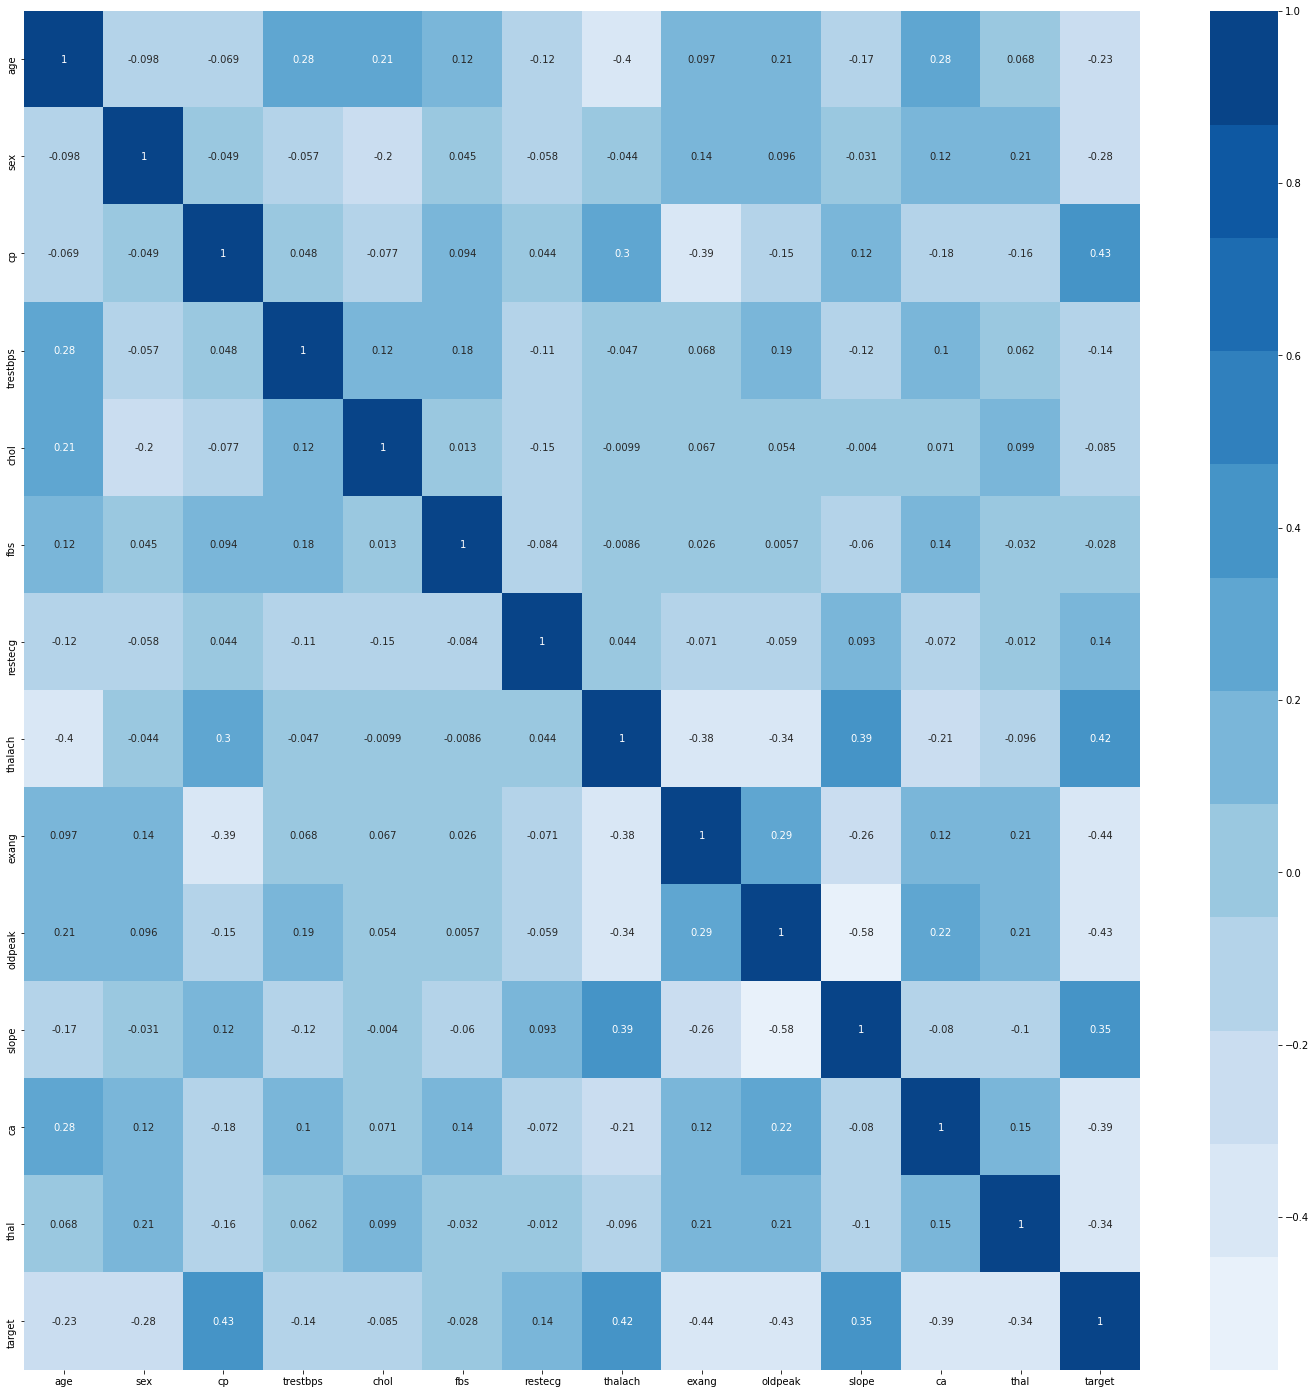

In [153]:
# Correlation matrix of dataset

import seaborn as sns

corr = df.corr() # get the correlation matrix 

# Plot the correlation matrix
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap=sns.color_palette("Blues", 12)) # Use blue color


In [154]:
# Assign X as the attributes
X = df.drop(['target'], axis=1)

# Assign y as the label (target column)
y = df['target']

X.head() # show the attributes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [155]:
# Show the label column
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Split to train-test set

In [156]:
from sklearn.model_selection import train_test_split

# Split 70:30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model testing

### Random Forest

In [157]:
# TEST: Use random forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [158]:
pred = model.predict(X_test)

In [159]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[33,  8],
       [ 9, 41]], dtype=int64)

In [160]:
# Show accuracy, precision, and recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Accuracy: {round(accuracy_score(y_test, pred) * 100, 2)} %")
print(f"Precision: {round(precision_score(y_test, pred)*100, 2)} %")
print(f"Recall: {round(recall_score(y_test, pred)*100, 2)} %")


Accuracy: 81.32 %
Precision: 83.67 %
Recall: 82.0 %


In [161]:
from sklearn.model_selection import RandomizedSearchCV

random_forrest_classifier = RandomForestClassifier(n_jobs=-1)

In [162]:
# Create the hyperparameters

from scipy.stats import randint
parameters={'max_depth': [3, 5, 10, None],
            'n_estimators':[10, 100, 200, 300, 400, 500],
            'max_features': randint(1,31), 
            'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 
            'min_samples_leaf': randint(1, 31),}

In [163]:
# search the hyperparameters for the most optimum parameter. Cross-validation is 5 times

random_forrest_search_classifier = RandomizedSearchCV(
    random_forrest_classifier, param_distributions=parameters, n_jobs=-1, n_iter=40, cv=5)


In [164]:
# Training

random_forrest_search_classifier.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C59F786370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C59D533610>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]})

In [165]:
# Show the best parameters and score from search_classifier

params = random_forrest_search_classifier.best_params_
score = random_forrest_search_classifier.best_score_
print(params)
print(score)


{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 28, 'n_estimators': 500}
0.839313399778516


In [166]:
pred = random_forrest_search_classifier.predict(X_test)

confusion_matrix(y_test, pred)


array([[32,  9],
       [ 6, 44]], dtype=int64)

In [167]:
# Print accuracy, recall and precision

print(f"Accuracy: {round(accuracy_score(y_test, pred) * 100, 2)} %")
print(f"Precision: {round(precision_score(y_test, pred)*100, 2)} %")
print(f"Recall: {round(recall_score(y_test, pred)*100, 2)} %")


Accuracy: 83.52 %
Precision: 83.02 %
Recall: 88.0 %


## Export model using pickle

In [168]:
import pickle

pickle.dump(random_forrest_search_classifier, open('../Model/heart.pkl', 'wb'))
